### Eq. 5
#### From Stolper et al., 2018, the effects of Δ47 by carbonate diagenesis can be described by the following equation:
$$
\frac{d\Delta 47(t,d)}{dt} = -R(t)\times\Delta 47_{init}(t,d) + R(t)\times\Delta 47_{recry}(t,d) \\
\begin{aligned}
&\Delta 47(t,d) \text{: Δ47}\\  
&R(t) \text{: Reacting Rate}\\
&\Delta 47_{init}(t,d) \text{: Initial Δ47}\\
&\Delta 47_{recry}(t,d) \text{: Diagenesised Δ47}
\end{aligned}
$$

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the carbonate diagenesised Δ47 first-order differentiation kinetic model
def Carbonate_diagenesis_d47_model(d47, t, R, d47_init, d47_recry):
    d47_dt = -R * d47_init + R * d47_recry
    return d47_dt

# Experimental parameters
R = 0.01 # reaction rate
d47_init = 10.0  # Initial Δ47 
d47_recry = 5.0 # Diagenesised Δ47

In [4]:
# Set the time steps
t = np.linspace(0, 10, 100)  

# Calculate the carbonate diagenesised Δ47 first-order differentiation kinetic model
d47 = odeint(Carbonate_diagenesis_d47_model, d47_init, t, args=(R, d47_init, d47_recry))

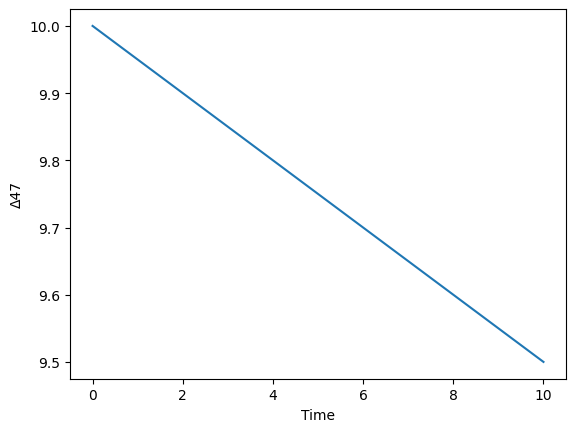

In [5]:
plt.plot(t, d47)
plt.xlabel('Time')
plt.ylabel('Δ47')
plt.show()

### Eq. 6
#### Unfortuinately, the above equation cannot be used to describe the effects of Δ47 by carbonate diagenesis. Reseaons are as follows:
1. The carbonate always keeps mass balance during the diagenesis.
2. The unreacted carbonate is linear mixed with re-crystaled carbonate during the diagenesis.
3. The un- and re-crystaled carbonate have tiny differences in their carbon and oxygen istopes (Defliese and Lohmann, 2015)
4. The reacting rate (Rt) is not constant during the diagenesis.

#### Therefore, the following equation is used to describe the effects of Δ47 by carbonate diagenesis:
$$
\begin{aligned}
\Delta 47(M_l) &= M_l \times [1 - R(M_l)] \times \Delta 47_{init}(M_0) \\
&+ M_l \times R(M_l) \times \Delta 47_{recry}(M_l) \\
&\Delta 47(M_l) \text{: The Δ47 in the first depositing-diaganesis period}\\
&M_l \text{: Carbonate mass in the first depositing-diaganesis period}\\  
&R(M_l) \text{: Reacting rate in the first depositing-diaganesis period}\\
&\Delta 47_{init}(M_0) \text{: Initial Δ47}\\
&\Delta 47_{recry}(M_l) \text{: Diaganesised Δ47 in the first depositing-diaganesis period}
\end{aligned}
$$

In [6]:
import numpy as np
from scipy.integrate import odeint

# Define the carbonate diagenesised Δ47 first-order differentiation kinetic model in dt
def dt_Carbonate_diagenesis_d47_model(d47, ml, R, d47_init, d47_recry):
    d47_dt = ml * (1 - R) * d47_init + ml * R * d47_recry
    return d47_dt

# Experimental parameters
ml = 0.8 # Carbonate mass
R = 0.01 # Reacting rate
d47_init = 10 # Initial Δ47
d47_recry = 5 # Diagenesised Δ47  

In [7]:
# Set the time steps
t = np.linspace(0, 10, 100)  

# Calculate the carbonate diagenesised Δ47 first-order differentiation kinetic model
d47 = odeint(dt_Carbonate_diagenesis_d47_model, d47_init, t, args=(ml, R, d47_recry))

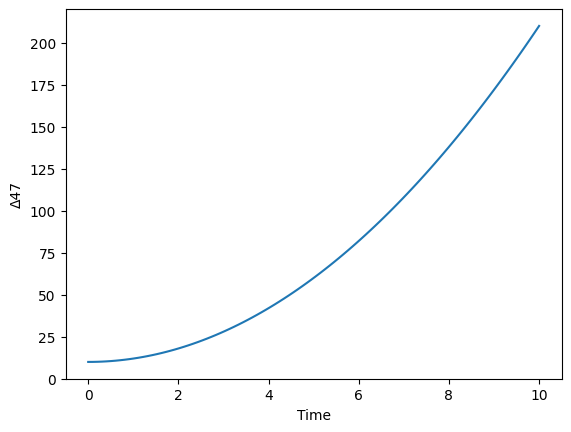

In [8]:
import matplotlib.pyplot as plt 
plt.plot(t, d47)
plt.xlabel('Time')
plt.ylabel('Δ47')
plt.show()

#### Here, we make an experiment that the carbonate has five diaganesis periods.

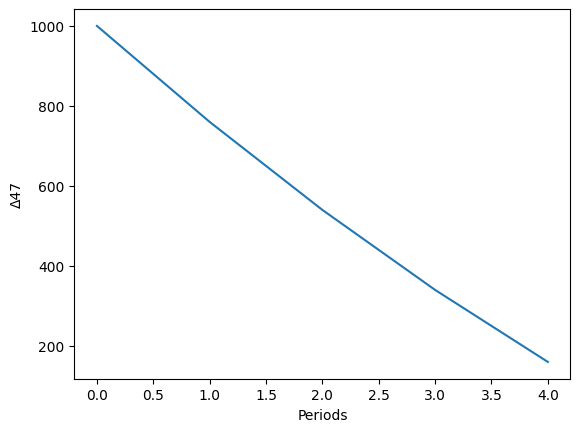

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter initialization
M0 = 100  
d47_init = 10
d47_recry = 5
periods = 5

# Reacting function 
def R(Ml):
    return 0.5 * (1 - Ml/M0)  

# Periodic Δ47
results = np.zeros(periods)
for i in range(periods):
    Ml = M0 * (1 - 0.2*i) 
    Rl = R(Ml)
    results[i] = Ml * (1 - Rl) * d47_init + Ml * Rl * d47_recry

plt.plot(results)
plt.xlabel('Periods')
plt.ylabel('Δ47')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25180\3968852907.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d47[i] = d47_tmp[-1]


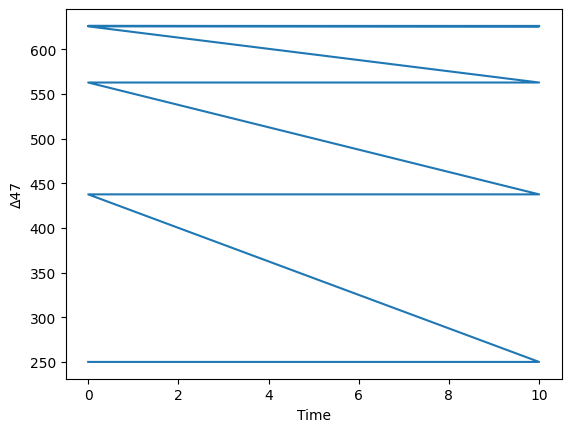

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set five diaganesis periods
periods = 5  
t_max = 10 # Max diaganesis time

# Parameter initialization
d47 = np.zeros(periods) 
d47[0] = 10 # Initial Δ47

ml = np.linspace(1, 0, periods) # Carbonate mass
R = 0.01 * np.ones(periods) # Reacting rate
d47_recry = np.ones(periods) * 5 # Diaganesised Δ47

# Time sequence
t = np.linspace(0, t_max, 100) 
t = np.repeat(t[np.newaxis, :], periods, axis=0)  # 将t变为二维数组

# Loop calculation
results = np.zeros((periods, 100)) 
for i in range(periods):
    d47_i =  d47[i-1]
    ml_i = ml[i]  
    R_i = R[i]
    d47_recry_i = d47_recry[i]
    t_i = t[i, :]
    d47_tmp = odeint(dt_Carbonate_diagenesis_d47_model, d47_i, t_i, args=(ml_i, R_i, d47_recry_i))
    d47[i] = d47_tmp[-1]
    results[i] = d47[i]

plt.plot(t.ravel(), results.ravel())
plt.xlabel('Time')
plt.ylabel('Δ47')
plt.show()

### Eq. 7
#### Except for the rating differences of DIC vs. Recrystalization, the re-ordering process caused by the carbonate burial would also affect Δ47. Usually, the re-ordering follows the first-order differentiation kinetic model. The relationship of Δ47 and t can be described as:
$$
\begin{aligned}
\ln\left[\frac{\Delta 47_t - \Delta 47_\text{eq}}{\Delta 47_\text{init} - \Delta 47_\text{eq}}\right] &= -kt\\
&\Delta 47_t: \text{experience time } t \text{ after reordering the} \Delta 47 \text{value}\\
&\Delta 47_\text{eq} \text{and} \Delta 47_\text{init}: \text{are balanced and initial} \Delta 47 \text{values}\\
&k: \text{reacting rate,relating to the thermal parameters}: \\  
&k(T) = A\cdot \exp\left[\frac{-E_a}{RT}\right]\\
&T: \text{the environmental thermal parameters(K)}\\
&A: \text{pre-exponential factor}\\
&E_a: \text{apparent activation energy}\\
&R: \text{molar gas constant}
\end{aligned}
$$
#### For K, it can be further calculated by:
$$
k(T) = A\cdot \exp\left[\frac{-E_a}{RT}\right]
$$

In [24]:
import math

def calculate(delta47_t, delta47_eq, delta47_init, k, t, A, Ea, R, T):

    # ln
    ln_expr = math.log((delta47_t - delta47_eq) / (delta47_init - delta47_eq))
    
    # kt
    kt = -ln_expr

    # k
    k_arr = A * math.exp(-Ea / (R * T)+bias)

    return kt, k_arr

if __name__ == '__main__':

    delta47_t = 0.35
    delta47_eq = 0.60
    delta47_init = 0.58
    k = 0.01
    t = 275
    A = 1
    Ea = 23000
    R = 1
    T = 298
    bias = 20

    kt, k_arr = calculate(delta47_t, delta47_eq, delta47_init, k, t, A, Ea, R, T)
    
    print(f"The kt is: {kt}") 
    print(f"The calculated K by Arrhenius formula: {k_arr}")

The kt is: -2.5257286443082547
The calculated K by Arrhenius formula: 0.4900106130728221


In [ ]:
import numpy as np
from scipy.integrate import odeint

# Like Liu et al., 2023 "碳酸盐岩团簇同位素约束下的川东地区二叠系热演化", "地质学报", if we can know the strata temprature varations
old_time = list(range(0, 275, 25))
simulated_temprature = [25, 75, 130, 140, 150, 200, 225, 140, 100, 50, 25]

# 参数
T = simulated_temprature # 温度
t = old_time # 时间区间
Δ47eq = 0.6 # 平衡Δ47值

# 初始化Δ47数组
Δ47 = [0.58]  

# 定义微分方程
def reorder(Δ47_ode, t, T, Δ47eq):

  Δ47 = Δ47_ode[0]

  # 使用T[i]取温度值
  exp_term = -23000/(T[i]*(1e+6)*365*24*60*60+1) + 20 
  
  exp_value = np.exp(exp_term)

  Δ47_new = Δ47eq + (Δ47 - Δ47eq) * np.exp(-exp_value * t)

  # 添加判断
  if Δ47> 0.6:
    Δ47_new *= 0.25

  Δ47_ode[0] = Δ47_new

  return Δ47_ode

# 求解Δ47t
Δ47t = odeint(reorder, Δ47, t, args=(T, Δ47eq), rtol=1e-5, atol=1e-8)[:, -1]/100
# 第一个值特殊处理
Δ47t[0] = Δ47t[0] * (100 if t[0] == 0 else 1)


# 输出Δ47t
print(Δ47t)

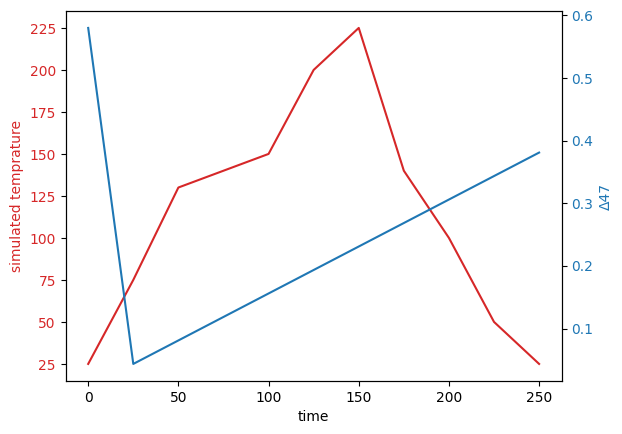

In [178]:
# 绘图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('simulated temprature', color=color)
ax1.plot(old_time, simulated_temprature, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Δ47', color=color)  
ax2.plot(old_time, Δ47t, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#### From Zhu et al., 2017; Li et al., 2021; Feng et al., 2022, the stratigraphic thermal parameters (275,0,5; Ma.) can be simulated as: 

In [1]:
stra_temprature = [
    20.07814, 27.13262, 37.1717,42.14601, 48.20563, 55.16967, 62.22415, 68.19333, 77.23754, 85.28688, 96.23037, 108.25917, 117.30338, 123.363,
    131.3219, 125.35272, 121.28283, 117.30338, 121.28283, 121.28283, 123.363, 126.34759, 129.33218, 129.33218, 132.31676, 135.30135, 136.38666,
    138.37638, 140.36611, 143.3507, 143.3507, 146.33529, 150.40518, 154.38463, 158.36408, 163.42884, 166.41343, 170.39288, 172.38261, 175.45764,
    180.43195, 185.40627, 187.48643, 190.47102, 194.45047, 201.50496, 203.49468, 208.469, 208.469, 211.45359, 215.52348, 219.50293, 222.48752,
    223.48238, 225.56255, 218.50807, 210.45872, 206.47927, 202.49982, 198.42993, 192.46075, 187.48643, 179.43709, 172.38261, 163.42884, 154.38463,
    149.41032, 141.36097, 133.31163, 124.35786,	117.30338, 106.26945, 100.30027, 87.27661, 80.22213, 71.17792, 63.21901, 53.17994, 46.12546, 39.16142,
    34.18711, 26.13776,22.15831
]

In [2]:
ancient_time = [
    272.62724, 269.31875, 265.95011, 263.30331, 261.97992, 258.61127, 256.62617, 253.97938, 253.31768, 251.99429, 251.27243, 249.28734, 247.96394, 246.64054, 244.65545, 241.2868,
    235.99322, 235.99202, 231.97778, 230.63947, 221.97724, 215.3001, 211.32991, 205.97617, 202.60753, 197.97564, 194.60699, 190.6368, 187.32831, 181.97457, 177.94422, 173.31233,
    168.62029, 165.3118, 161.28146, 157.31127, 153.94262, 151.29583, 148.64903, 145.28039, 141.97189, 139.3251, 136.61815, 131.32457, 127.95592, 125.30913, 122.00063, 119.29369,
    116.64689, 113.27825, 111.29315, 107.98466, 106.66126, 104.61601, 101.96922, 99.32243, 97.33733, 93.96869, 92.64529, 89.9985, 87.95325, 83.98306, 81.99796, 76.64422, 72.67403,
    69.30538, 66.05859, 61.30485, 57.33466, 52.64262, 48.67243, 45.30378, 40.01019, 34.65645, 28.64101, 24.67082, 21.30218, 17.33199, 13.96334, 9.33145, 5.9628, 1.99261, 0
]

In [4]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve

# 参数
T = stra_temprature # 温度
t = ancient_time # 时间区间
Δ47eq = 0.6 # 平衡Δ47值

# 初始化Δ47数组
Δ47 = [0.58]  

# 定义微分方程
def reorder(Δ47_ode, t, T, Δ47eq):

  Δ47 = Δ47_ode[0]

  # 使用T[i]取温度值
  for i in range(len(stra_temprature)):
    exp_term = -23000/(T[i]*(1e+6)*365*24*60*60+1) + 20 
  
    exp_value = np.exp(exp_term)

    Δ47_new = Δ47eq + (Δ47 - Δ47eq) * np.exp(-exp_value * t)

  # 添加判断
  if Δ47> 0.6:
    Δ47_new *= 0.25

  Δ47_ode[0] = Δ47_new

  return Δ47_ode

# 求解Δ47t
Δ47t = odeint(reorder, Δ47, t, args=(T, Δ47eq), rtol=1e-5, atol=1e-8)[:, -1]/100
# 第一个值特殊处理
Δ47t[0] = Δ47t[0] * (100 if t[0] == 0 else 1)

# 求解温度
import numpy as np
from scipy.integrate import odeint

# 参数
T = stra_temprature # 温度
t = ancient_time # 时间区间
Δ47eq = 0.6 # 平衡Δ47值

# 初始化Δ47数组
Δ47 = [0.58]  

# 定义微分方程
def reorder(Δ47_ode, t, T, Δ47eq):

  Δ47 = Δ47_ode[0]

  # 使用T[i]取温度值
  for i in range(len(stra_temprature)):
    exp_term = -23000/(T[i]*(1e+6)*365*24*60*60+1) + 20 
  
    exp_value = np.exp(exp_term)

    Δ47_new = Δ47eq + (Δ47 - Δ47eq) * np.exp(-exp_value * t)

  # 添加判断
  if Δ47> 0.6:
    Δ47_new *= 0.25

  Δ47_ode[0] = Δ47_new

  return Δ47_ode

# 求解Δ47t
Δ47t = odeint(reorder, Δ47, t, args=(T, Δ47eq), rtol=1e-5, atol=1e-8)[:, -1]/100
# 第一个值特殊处理
Δ47t[0] = Δ47t[0] * (100 if t[0] == 0 else 1)

# 定义方程
def equation(T):
    return 0.0422 * np.power(10, 6) * np.power(T, -2) + 0.1262 - Δ47

# 求解温度
# 从根中筛选出实数根作为温度值
# 使用fsolve()函数求解方程的根
roots = fsolve(equation, 100)  # 以100为初始猜测值

print(simulated_temprature)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34276\3475894663.py:23: RuntimeWarning: overflow encountered in exp
  Δ47_new = Δ47eq + (Δ47 - Δ47eq) * np.exp(-exp_value * t)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_34276\3475894663.py:23: RuntimeWarning: overflow encountered in scalar multiply
  Δ47_new = Δ47eq + (Δ47 - Δ47eq) * np.exp(-exp_value * t)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_34276\3475894663.py:61: RuntimeWarning: overflow encountered in exp
  Δ47_new = Δ47eq + (Δ47 - Δ47eq) * np.exp(-exp_value * t)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_34276\3475894663.py:61: RuntimeWarning: overflow encountered in scalar multiply
  Δ47_new = Δ47eq + (Δ47 - Δ47eq) * np.exp(-exp_value * t)


TypeError: dispatcher for __array_function__ did not return an iterable

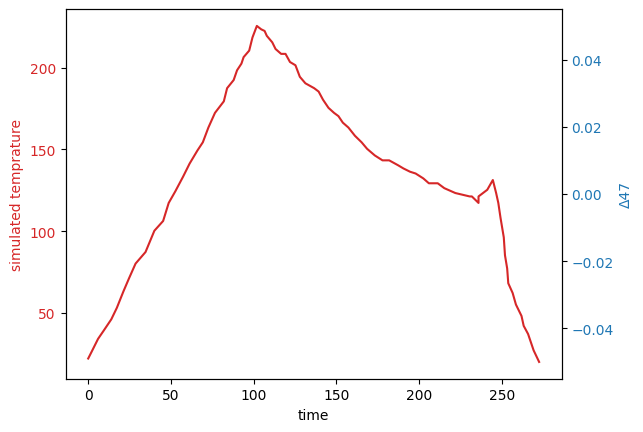

In [19]:
import matplotlib.pyplot as plt

# 绘图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('simulated temprature', color=color)
ax1.plot(ancient_time, stra_temprature, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Δ47', color=color)  
ax2.plot(ancient_time, simulated_temprature, color=color)
ax2.tick_params(axis='y', labelcolor=color)